### How Ridge Regression Works? How it solves Overfitting?
Ridge regression adds one more term to Linear regression’s cost function. 

The main reason these penalty terms are added is to make sure there is regularization that is, shrinking the weights of the model to zero or close to zero, to make sure that the model does not overfit the data.

In the context of machine learning, regularization is the process that regularizes or shrinks the coefficients towards zero. In simple words, regularization discourages learning a more complex or flexible model to prevent overfitting. Let’s look at a cost function for a better understanding.


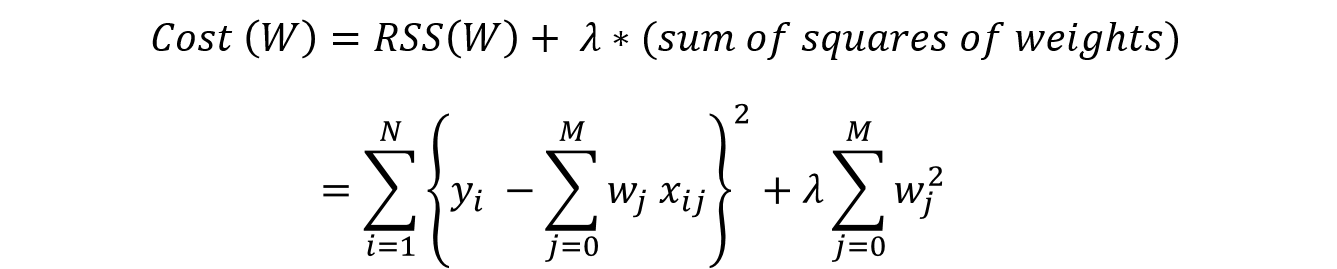

In [1]:
from IPython import display 
display.Image("C:\\Users\\Pratik1\Desktop\dataset\MACHINE_LEARNING=CLASS+PRACTICE\RIDGE&LASSO\\COST_FUNCTION.png")

The Residual Sum of Squares measures the amount of error staying between the regression function and the data set.

It is a measure of the amount of statistical variance present in the dataset.


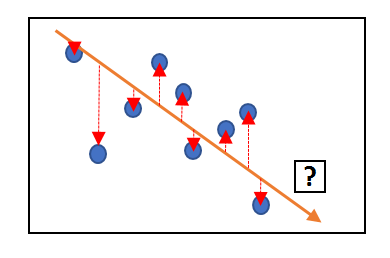

In [2]:
from IPython import display 
display.Image("C:\\Users\\Pratik1\Desktop\dataset\MACHINE_LEARNING=CLASS+PRACTICE\RIDGE&LASSO\\graph.png")

For fixed values of lambda in the second term, the multiplication of lambda along with c yields a constant term. 
So essentially, we will be reducing the equation we have for the ridge above. Lambda (or alpha) is a hyper-parameter that we tune and we set it to a particular value based on our choice. If it is set to zero then the equation of ridge gets converted to that of normal linear regression. The value of lambda will be chosen by cross-validation.

α can take various values:
α = 0:
The goal becomes the same as simple linear regression.
We’ll get the same coefficients as simple linear regression.

α = ∞:
The coefficients will be zero. Why? Because of infinite weightage on a square of coefficients, anything less than zero will make the objective infinite.

0 < α < ∞:
The magnitude of α will decide the weightage given to different parts of the cost function.
The coefficients will be somewhere between 0 and ones for simple linear regression.

lambda(alpha) this constraint causes the value of the coefficient to tend towards zero. 

This leads to both low variance (as some coefficient leads to negligible effect on prediction) and low bias (minimization of 

coefficient reduce the dependency of prediction on a particular variable).



where lambda is regularization penalty.

Limitation of Ridge Regression: Ridge regression decreases the complexity of a model but does not reduce the number of variables 

since it never leads to a coefficient been zero rather only minimizes it. Hence, this model is not good for feature reduction.

In [3]:
#loading a dataset
from sklearn.datasets import load_boston

In [4]:
#reading a file
df=load_boston()
df_D=pd.DataFrame(df.data)
print(df_D.head())

<IPython.core.display.Javascript object>

        0     1     2    3      4      5     6       7    8      9     10  \
0  0.00632  18.0  2.31  0.0  0.538  6.575  65.2  4.0900  1.0  296.0  15.3   
1  0.02731   0.0  7.07  0.0  0.469  6.421  78.9  4.9671  2.0  242.0  17.8   
2  0.02729   0.0  7.07  0.0  0.469  7.185  61.1  4.9671  2.0  242.0  17.8   
3  0.03237   0.0  2.18  0.0  0.458  6.998  45.8  6.0622  3.0  222.0  18.7   
4  0.06905   0.0  2.18  0.0  0.458  7.147  54.2  6.0622  3.0  222.0  18.7   

       11    12  
0  396.90  4.98  
1  396.90  9.14  
2  392.83  4.03  
3  394.63  2.94  
4  396.90  5.33  


In [5]:
#assigning names
df_D.columns=df.feature_names

In [6]:
#getting head part
print(df_D.head())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33  


In [7]:
#target columns and rows
df.target.shape

(506,)

In [8]:
#assign new value to features
df_D['Price']=df.target

In [9]:
#dependant and independant features
x=df_D.iloc[:,:-1]
y=df_D.iloc[:,-1]

In [13]:
#importing linear regression
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
model=LinearRegression()
mse=cross_val_score(model,x,y,scoring="neg_mean_squared_error",cv=5)
mean_mse=np.mean(mse)
print(mean_mse)

<IPython.core.display.Javascript object>

-37.131807467699204


In [19]:
#import ridge method
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
ridge=Ridge()
parameters={"alpha":[1,2,3,4,5,6,7,8,9,10,20,30]}
ridge_regressor=GridSearchCV(ridge,parameters,scoring="neg_mean_squared_error",cv=5)
ridge_regressor.fit(x,y)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 30]},
             scoring='neg_mean_squared_error')

In [20]:
#getting best parameters of ridge method

print(ridge_regressor.best_params_)

{'alpha': 30}


In [21]:
#getting best score of ridge
print(ridge_regressor.best_score_)

-31.668993680594674


In [23]:
#spiltting data 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [24]:
#prediction using ridge method 
prediction_ridge=ridge_regressor.predict(X_test)

<IPython.core.display.Javascript object>

C:\Users\Pratik1\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

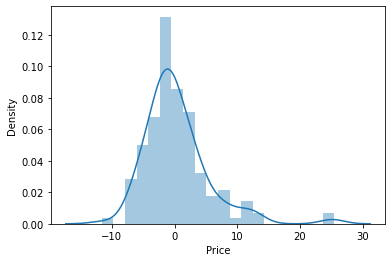

In [25]:
#dist plot of prediction
sns.distplot(y_test-prediction_ridge)